In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from joblib import delayed, Parallel
from tqdm import tqdm

# from sklearn.metrics import 
plt.rcParams['text.usetex'] = True


In [4]:


dfnum = pd.read_csv('numeric_data_agri.csv')
# Clean and prepare data
df_clean = dfnum.dropna(subset=['ckd_code_sample_1'])
X = df_clean.drop(columns=['ckd_code_sample_1', 'ckd__probable_sample_1', 'ckd_epi_sample_1'])
y = df_clean['ckd_code_sample_1']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Create and train Decision Tree
cdk_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'  # Handles class imbalance like RandomForest
)
cdk_model.fit(X_train, y_train)

# Predict
y_pred = cdk_model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       539
         1.0       0.90      0.87      0.88       122
         2.0       0.25      0.33      0.29         6

    accuracy                           0.96       667
   macro avg       0.71      0.73      0.72       667
weighted avg       0.96      0.96      0.96       667

[[531   8   0]
 [ 10 106   6]
 [  0   4   2]]


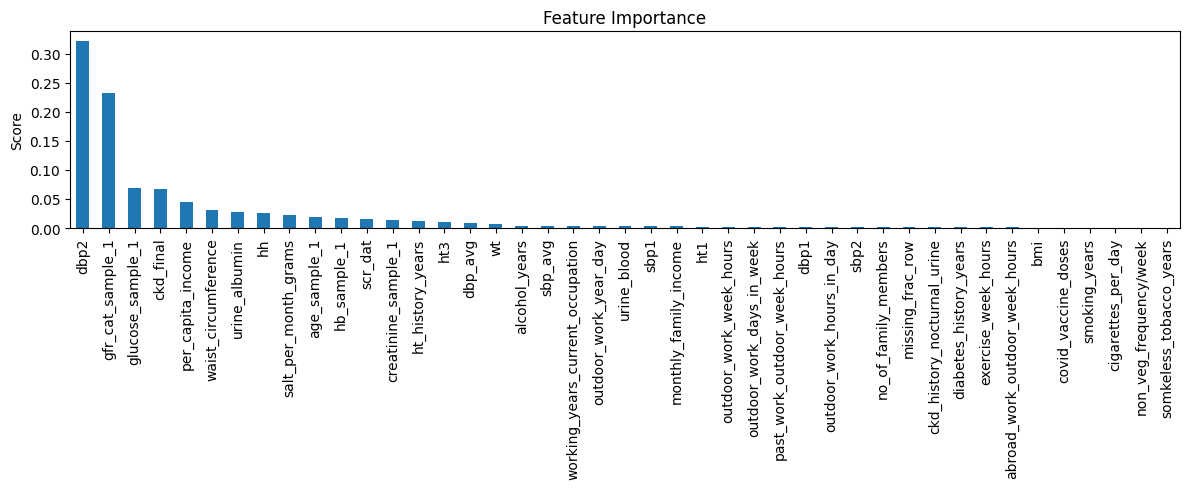

In [10]:

importances = pd.Series(cdk_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title("Feature Importance")
plt.ylabel("Score")
plt.tight_layout()
plt.savefig('feature_importance_cdk_dtree.png', dpi=450)

plt.show()
